In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import sys
sys.path.append('code/')

In [4]:
from retriever_functions import *

In [5]:
citation_data = pd.read_csv('data/FRB_citations_23.csv')
abstract_data = pd.read_csv('data/FRB_abstracts.csv')

In [6]:
citation_data

,txt_ref,arxiv_id,reasons
0,lorimer et al. 2007,arXiv:0709.4301,these references are cited to provide backgrou...
1,petroff et al. 2022; petroff et al. 2021,arXiv:2107.10113,these references are cited to provide backgrou...
2,cordes & chatterjee 2019,arXiv:1906.05878,these references are cited to provide backgrou...
3,zhang 2022; zhang 2022a; zhang 2022b,arXiv:2212.03972,these references are cited to provide backgrou...
4,margalit et al. 2019,arXiv:1907.00016,these references are cited to support the conn...
...,...,...,...
2361,hankins et al. 2016,arXiv:1608.08881,referenced to mention the observation of main ...
2362,mondal et al. 2020,arXiv:2008.11375,cited to mention the possible turnover in the ...
2363,mcconnell & ma 2013,arXiv:1211.2816,these papers are cited to provide background i...
2364,reines & volonteri 2015,arXiv:1508.06274,these papers are cited to provide background i...


In [7]:
abstract_data

,arxiv_id,authors,title,abstract,category
0,arXiv:2308.14387,Pavan A. Uttarkar et al.,Searching for the spectral depolarisation of A...,Fast Radio Bursts (FRBs) are extragalactic tra...,astro-ph.HE
1,arXiv:2308.14325,Zhao-Yang Xia et al.,Polarization Evolution of Fast Radio Burst Sou...,"Recently, some fast radio bursts (FRBs) have b...",astro-ph.HE
2,arXiv:2308.12801,Shivani Bhandari et al.,Constraints on the persistent radio source ass...,We present very-long-baseline interferometry (...,astro-ph.HE
3,arXiv:2308.12432,Evan F. Lewis et al.,The Petabyte Project,"Transient radio sources, such as fast radio bu...",astro-ph.IM
4,arXiv:2308.12118,Danté M. Hewitt et al.,Dense Forests of Microshots in Bursts from FRB...,We report on exceptionally bright bursts (>400...,astro-ph.HE
...,...,...,...,...,...
1348,arXiv:1611.06481,"He Gao, Bing Zhang,",Implications from the upper limit of radio aft...,"A $\gamma$-ray transient, Swift J0644.5-5111, ...",astro-ph.HE
1349,arXiv:1610.09043,S. Johnston et al.,Radio light curve of the galaxy possibly assoc...,We present observations made with the Australi...,astro-ph.GA
1350,arXiv:1603.04825,"Ye Li, Bing Zhang,",Radio transient following FRB 150418: afterglo...,"Recently, Keane et al. reported the discovery ...",astro-ph.HE
1351,arXiv:1602.08086,"Bing Zhang,",On the afterglow and progenitor of FRB 150418,Keane et al. recently detected a fading radio ...,astro-ph.HE


In [8]:
retriever_abstract = gen_retriever('VectorStoreIndex', 'abstract', path_to_db_folder='data/')
retriever_citation = gen_retriever('VectorStoreIndex', 'citation', path_to_db_folder='data/')

### an example where citation clearly gives more desirable results

In [9]:
q = 'what is fast radio burst (frb)'

In [10]:
rst_all_abstract = retriever_abstract.retrieve(q)
rst_all_citation = retriever_citation.retrieve(q)

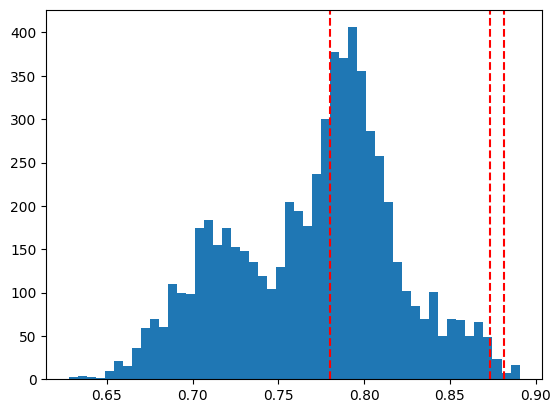

In [11]:
scores = get_all_scores(rst_all_citation)
score_threshold = np.percentile(scores, 99.7)

In [12]:
rst_abstract = rearrange_query_results(rst_all_abstract, score_threshold=0.8)
rst_citation = rearrange_query_results(rst_all_citation, score_threshold=score_threshold)

In [13]:
# citation search
print_citation_query_results(citation_data, rst_citation)

1. lorimer et al. 2007, arXiv:0709.4301

Reasons of citation: referenced as the original discovery of fast radio bursts (frbs).; referenced as the first discovery of fast radio bursts (frbs).; referenced as the first discovery of fast radio bursts (frbs).; referenced as the first discovery of fast radio bursts (frbs).; referenced to provide background information on the duration of fast radio bursts (frbs).; referenced to indicate the year of discovery of fast radio bursts (frbs).; referenced to introduce the concept of fast radio bursts (frbs) and their characteristics.; referenced to indicate the discovery of fast radio bursts (frbs) and establish the intense study of frbs in radio astronomy.; referenced to provide a general description of fast radio bursts (frbs) and their characteristics.; referenced to highlight the discovery of fast radio bursts (frbs) through radio astronomy.

2. thornton et al. 2013, arXiv:1307.1628

Reasons of citation: referenced to provide background informa

In [15]:
# abstract search
print_abstract_query_results(abstract_data, rst_abstract)

1. Bo-Jun Wang et al., arXiv:2301.01429

Title: Atlas of dynamic spectra of fast radio burst FRB 20201124A

Abstract: Fast radio bursts (FRBs) are highly dispersed millisecond-duration radio bursts, of which the physical origin is still not fully understood. FRB 20201124A is one of the most actively repeating FRBs. In this paper, we present the collection of 1863 burst dynamic spectra of FRB 20201124A measured with the Five-hundred-meter Aperture Spherical radio Telescope (FAST). The current collection, taken from the observation during the FRB active phase from April to June 2021, is the largest burst sample detected in any FRB so far. The standard PSRFITs format is adopted, including dynamic spectra of the burst, and the time information of the dynamic spectra, in addition, mask files help readers to identify the pulse positions are also provided.

2. Matthew Bailes, , arXiv:2211.06048

Title: The discovery and scientific potential of fast radio bursts

Abstract: Fast radio bursts (F

### example where citation is a bit better, but still a lot of noise
I know where the petroff papers come from... because I cited those papers in my own paper.  I can imagine why gpt thinks the reason for citation is like that, and it's unavoidable.

Perhaps in the future need to let gpt determine what the "noise" reasons of citation in each entry.

In this case the abstract search is not too bad, and I'm glad that it returned my own paper...

In [22]:
q = 'fast radio burst as a probe of circumgalactic medium (cgm)'

In [23]:
rst_all_abstract = retriever_abstract.retrieve(q)
rst_all_citation = retriever_citation.retrieve(q)

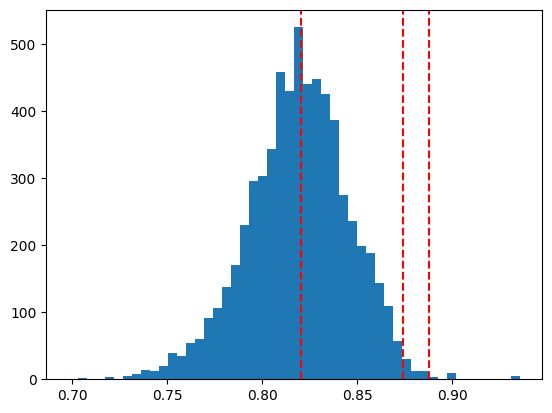

In [24]:
scores = get_all_scores(rst_all_citation)
score_threshold = np.percentile(scores, 99.7)

In [25]:
rst_abstract = rearrange_query_results(rst_all_abstract, score_threshold=0.8)
rst_citation = rearrange_query_results(rst_all_citation, score_threshold=score_threshold)

In [26]:
# citation search
print_citation_query_results(citation_data, rst_citation)

1. prochaska & zheng 2019, arXiv:1901.11051

Reasons of citation: cited to support the statement that fast radio bursts (frbs) are starting to provide an unprecedented probe of the circumgalactic medium (cgm) with the advent of many radio telescopes geared for this science coming online across the globe.; these papers are referenced to highlight the focus on studying the circumgalactic medium (cgm) with frbs, emphasizing its significance in galaxy formation and feedback processes and the challenges in detecting the cgm using traditional means.

2. ravi 2019, arXiv:1804.07291

Reasons of citation: these papers are referenced to highlight the focus on studying the circumgalactic medium (cgm) with frbs, emphasizing its significance in galaxy formation and feedback processes and the challenges in detecting the cgm using traditional means.; cited to highlight the use of dispersion measure (dm) measurements from fast radio bursts (frbs) to constrain the circumgalactic medium (cgm) gas distri

In [27]:
# abstract search
print_abstract_query_results(abstract_data, rst_abstract)

1. Vikram Ravi, , arXiv:1804.07291

Title: Measuring the circum- and inter-galactic baryon contents with fast radio bursts

Abstract: Over 80% of the cosmic baryon density is likely to be distributed in the diffuse, $\gtrsim10^{4}$ K circum- and inter-galactic medium (CGM and IGM respectively). We demonstrate that the dispersion measures (DMs) of samples of localized Fast Radio Bursts (FRBs) can be used to measure the distribution of baryons between the CGM and IGM. We propose to separate the CGM and IGM contributions to FRB DMs by including redshift and mass measurements of intervening galaxies. Using simulated samples of FRB sightlines through intervening galaxy halos and an illustrative model for the CGM, and including realistic observational uncertainties, we show that small samples ($O(10^{1})-O(10^{2})$) of localized FRBs are sensitive to the presence of CGM gas. The fractions of baryons in the CGM and IGM can be accurately estimated with 100 FRBs at $z<1$, and the characteristic

### example where combining both results should be better
Because the abstract search results can return more recent papers when it comes to gravitational lensing, and also the topic better.  But citation search has Lorimer and Cordes & Chatterjee which either are not relevant at all or come from noise like the CGM example above.

It seems like openai embedding matches Lorimer and Petroff etc. to everything... need to find out a way of prohibiting that.

In [28]:
q = 'fast radio burst gravitational lensing'

In [29]:
rst_all_abstract = retriever_abstract.retrieve(q)
rst_all_citation = retriever_citation.retrieve(q)

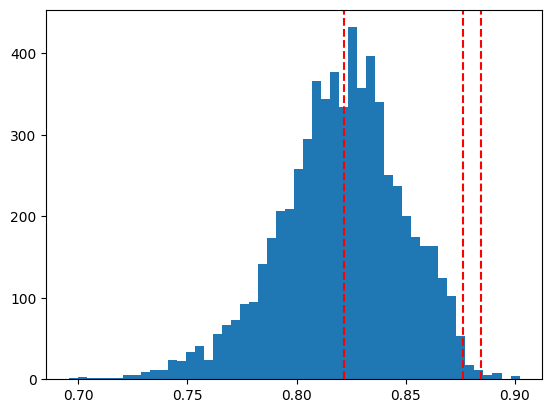

In [30]:
scores = get_all_scores(rst_all_citation)
score_threshold = np.percentile(scores, 99.7)

In [31]:
rst_abstract = rearrange_query_results(rst_all_abstract, score_threshold=0.8)
rst_citation = rearrange_query_results(rst_all_citation, score_threshold=score_threshold)

In [32]:
# citation
print_citation_query_results(citation_data, rst_citation)

1. munoz et al. 2016, arXiv:1605.00008

Reasons of citation: these references are cited to support the statement that one method for detecting dark compact objects is through gravitational lensing of radio transients, specifically fast radio bursts (frbs), and to provide a basis for discussing the cosmological distance and abundance of frbs as a candidate for time-domain gravitational lensing searches.; these papers are cited to support the statement that if a pair of gravitational waves (gws) and fast radio bursts (frbs) were lensed by an isolated black hole (bh), there would be multiple temporally resolvable frbs due to strong lensing.

2. wucknitz et al. 2021, arXiv:2004.11643

Reasons of citation: these references are cited to support the statement that one method for detecting dark compact objects is through gravitational lensing of radio transients, specifically fast radio bursts (frbs), and to provide a basis for discussing the cosmological distance and abundance of frbs as a ca

In [33]:
# abstract
print_abstract_query_results(abstract_data, rst_abstract)

1. Mawson W. Sammons et al., arXiv:2210.09487

Title: The Effect of Gravitational Lensing on Fast Transient Event Rates

Abstract: Fast cosmological transients such as fast radio bursts (FRBs) and gamma-ray bursts (GRBs) represent a class of sources more compact than any other cosmological object. As such they are sensitive to significant magnification via gravitational lensing from a class of lenses which are not well-constrained by observations today. Low-mass primordial black holes are one such candidate which may constitute a significant fraction of the Universe's dark matter. Current observations only constrain their density in the nearby Universe, giving fast transients from cosmological distances the potential to form complementary constraints. Motivated by this, we calculate the effect that gravitational lensing from a cosmological distribution of compact objects would have on the observed rates of FRBs and GRBs. For static lensing geometries, we rule out the prospect that all 

### example where citation query fails; abstract is way better
I don't understand... there are clearly sentences in my citation database that has scintillation in it and openai embedding doesn't think those are strongly relevant?

In [34]:
q = 'fast radio burst scintillation'

In [35]:
rst_all_abstract = retriever_abstract.retrieve(q)
rst_all_citation = retriever_citation.retrieve(q)

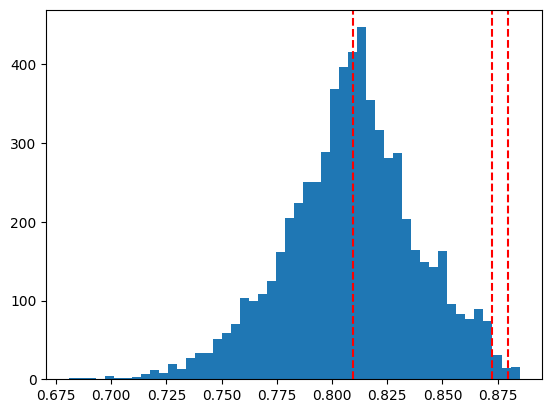

In [36]:
scores = get_all_scores(rst_all_citation)
score_threshold = np.percentile(scores, 99.7)

In [37]:
rst_abstract = rearrange_query_results(rst_all_abstract, score_threshold=0.8)
rst_citation = rearrange_query_results(rst_all_citation, score_threshold=score_threshold)

In [38]:
# citation
print_citation_query_results(citation_data, rst_citation)

1. lorimer et al. 2007, arXiv:0709.4301

Reasons of citation: referenced as the first discovery of fast radio bursts (frbs).; referenced as the first discovery of fast radio bursts (frbs).; referenced as the first discovery of fast radio bursts (frbs).; referenced to support the description of fast radio bursts (frbs) as bright, millisecond duration flashes of coherent radio emission.; referenced to support the general description of fast radio bursts (frbs) as short, bright flares of coherent radio emission.; these references are cited to support the statement that fast radio bursts (frbs) are bright, millisecond duration flares of coherent radio emission with large dispersion measures (dms) pointing to an extragalactic origin.; referenced as the original discovery of fast radio bursts (frbs).

2. thornton et al. 2013, arXiv:1307.1628

Reasons of citation: referenced to support the description of fast radio bursts (frbs) as bright, millisecond duration flashes of coherent radio emissi

In [39]:
# abstract
print_abstract_query_results(abstract_data, rst_abstract)

1. Qiwu Song et al., arXiv:1707.08979

Title: The radiation mechanism of fast radio bursts

Abstract: Fast radio bursts are radio transients observed mainly around 1.5 GHz. Their peak frequency decreases at a rate of 100 ~ 500 MHz/s and some of them have a broader pulse with an exponentially decaying tail. Common assumptions for fast radio bursts include a dispersion effect resulting in the peak frequency drifting and a scattering effect resulting in pulse broadening. These assumptions attribute the abnormally large dispersion measure and scattering measure to the environmental medium of the host galaxy. Here we show that the radiation of fast radio bursts can be explained as an undulator radiation and the large dispersion measure can be due to a motion effect mainly from the rotation of the source which is probably variable stars. In our scenario, the pulse broadening is near-field effects and the pulse itself represents a Fresnel diffraction pattern sweeping the observer. Our work is